Now let’s get started with the task of website traffic forecasting by importing the necessary Python libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

... and the dataset:

In [3]:
data = pd.read_csv('WebsiteTrafficForecastingData/Thecleverprogrammer.csv')
display(data.head())

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


The dataset contains two columns, date and traffic, let's check the type of our data:

In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


None

I'll check if this dataset has any null values or not:

In [5]:
display(data.isna().sum())

Date     0
Views    0
dtype: int64

Before moving forward, I will convert the Date column into Datetime data type:

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


None

Now let’s have a look at the daily traffic of the website:

In [7]:
figure = px.line(data,
                 x='Date',
                 y='Views', 
                 title='Daily Traffic of Thecleverprogrammer.com')
figure.show()

Our website traffic data is seasonal because the traffic on the website increases during the weekdays and decreases during the weekends. It is valuable to know if the dataset is seasonal or not while working on the problem of Time Series Forecasting. Below is how we can have a look at whether our dataset is stationary or seasonal:

<Figure size 640x480 with 0 Axes>

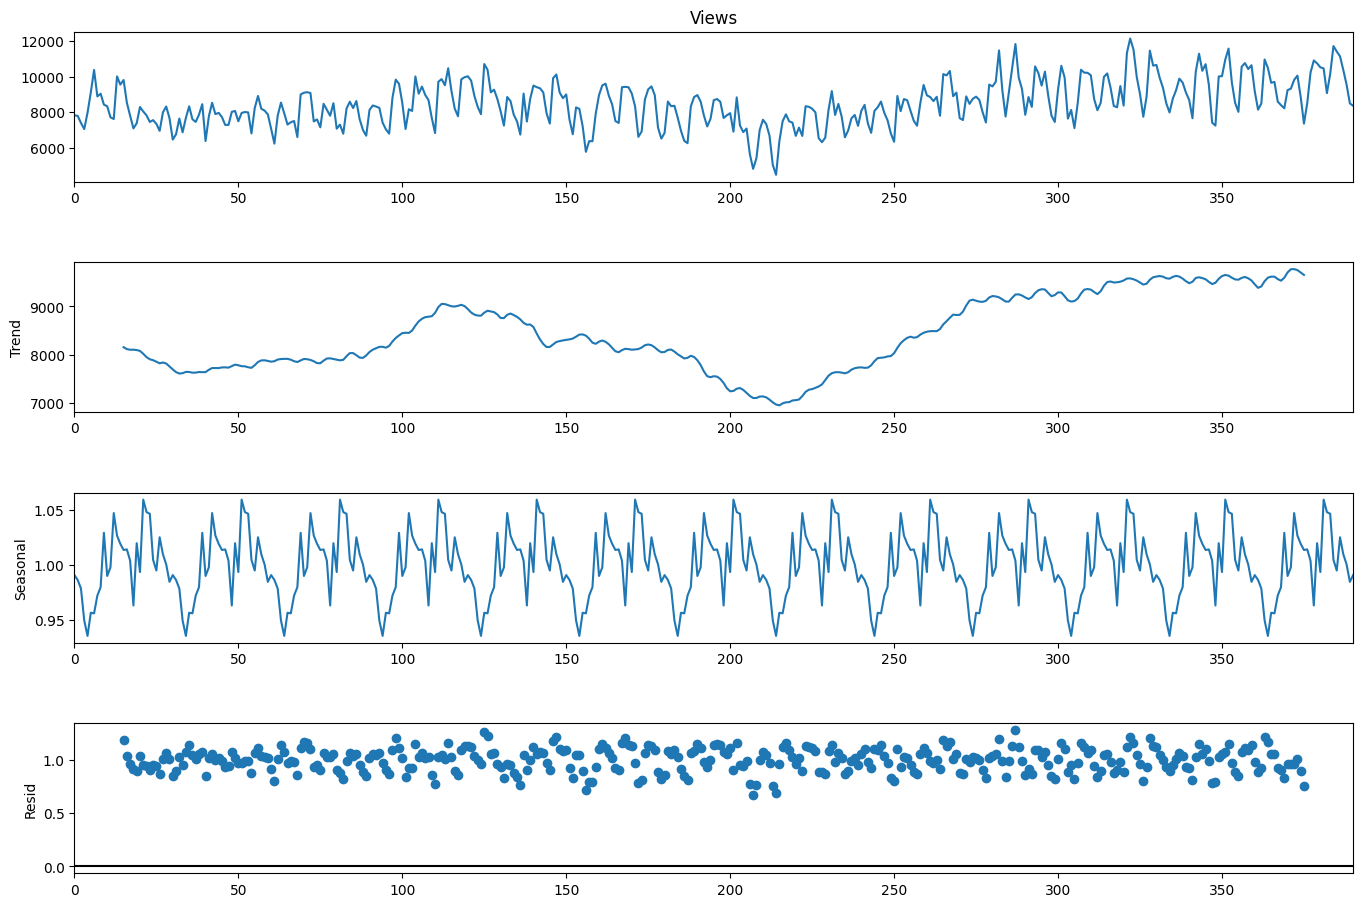

In [8]:
result = seasonal_decompose(data['Views'], 
                            model='multiplicative',
                            period=30)
fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(15, 10)

I will be using the Seasonal ARIMA (SARIMA) model to forecast traffic on the website. Before using the SARIMA model, it is necessary to find the p, d, and q values. As the data is not stationary, the value of d is 1. To find the values of p and q, we can use the autocorrelation and partial autocorrelation plots:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

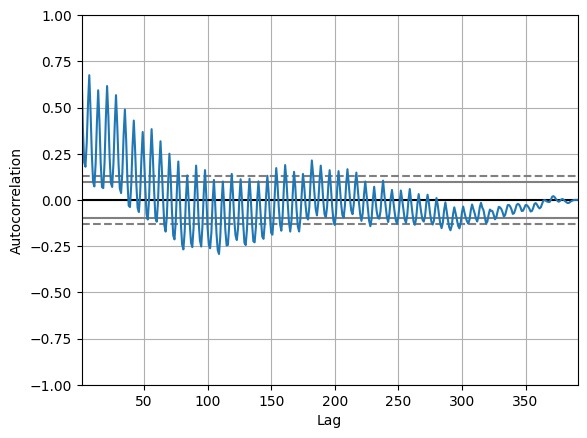

In [10]:
pd.plotting.autocorrelation_plot(data['Views'])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

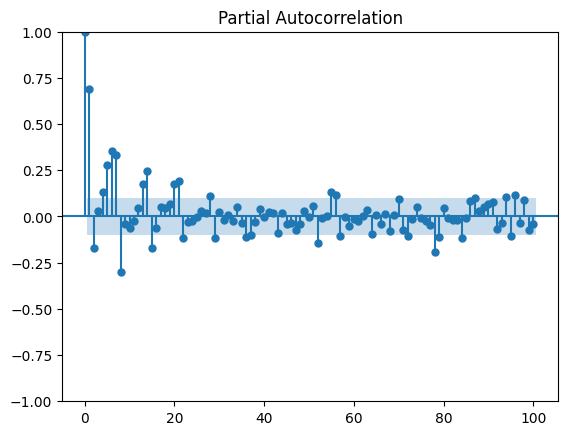

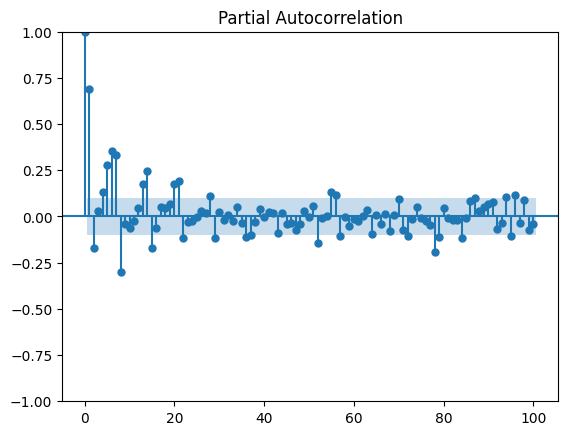

In [13]:
plot_pacf(data['Views'], lags = 100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now here’s how we can train a SARIMA model for the task of website traffic forecasting:

In [14]:
p, d, q = 5, 1, 2
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                  order=(p, d, q),
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
display(model.summary())

c:\Users\maraujo\OneDrive\MachineLearningPortifolio\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\maraujo\OneDrive\MachineLearningPortifolio\venv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.430
Date:                            Sun, 30 Apr 2023   AIC                           6228.861
Time:                                    18:20:17   BIC                           6287.884
Sample:                                         0   HQIC                          6252.286
                                            - 391                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7804      0.134      5.822      0.000       0.518       1.043
ar.L2         -0.7983      0.135     -5.931      0.000      -1.062      -0.534
ar.L3         -0.1442      0.169     -0.851      0.395      -0.476       0.188
ar.L4         -0.1829      0.151     -1.209      0.227      -0.480       0.114
ar.L5         -0.1563      0.139     -1.127      0.260      -0.428       0.116
ma.L1         -1.1820      0.095    -12.441      0.000      -1.368      -0.996
ma.L2          0.8847      0.079     11.254      0.000       0.731       1.039
ar.S.L12      -0.2624      4.649     -0.056      0.955      -9.374       8.849
ar.S.L24       0.0417      0.791      0.053      0.958      -1.508       1.591
ar.S.L36      -0.1877      0.245     -0.766      0.444      -0.668       0.292
ar.S.L48      -0.2159      0.965     -0.224      0.823      -2.108       1.676
ar.S.L60       0.0121      0.997      0.012      0.990      -1.942       1.966
ma.S.L12      -0.6886      4.652     -0.148      0.882      -9.805       8.428
ma.S.L24      -0.1000      3.666     -0.027      0.978      -7.286       7.086
sigma2      1.257e+06   1.59e+05      7.915      0.000    9.46e+05    1.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.32
Prob(Q):                              1.00   Prob(JB):                         0.52
Heteroskedasticity (H):               1.03   Skew:                             0.14
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.79e+14. Standard errors may be unstable.
"""

Now let’s forecast traffic on the website for the next 50 days:



In [15]:
predictions = model.predict(len(data), len(data) + 50)
display(predictions)

391     9875.220680
392    10789.302685
393    10758.239498
394     9862.450733
395     8765.353123
396     8213.808678
397     8930.630067
398     9687.038795
399    10271.989355
400    10625.214057
401     9851.734571
402     9361.335242
403     9041.482746
404     9083.653567
405    10540.869658
406    11003.954216
407    10894.812630
408    10080.088694
409     9445.173759
410     8631.266631
411     9185.897537
412    10395.390712
413    10593.970262
414    10786.509637
415    10261.471734
416     9450.066955
417     9044.345995
418     9172.749915
419     9890.454916
420    10220.105792
421    10714.034041
422     9897.223470
423     9542.275821
424     9069.459985
425     8827.774510
426    10139.317284
427    10839.346306
428    10903.461367
429    10409.129479
430     9450.658010
431     8699.485325
432     8727.729379
433    10062.427093
434    10505.317980
435    10839.170405
436    10483.145354
437     9334.518369
438     9177.729230
439     9360.739382
440    10298.420020


Here’s how we can plot the predictions:



<Axes: >

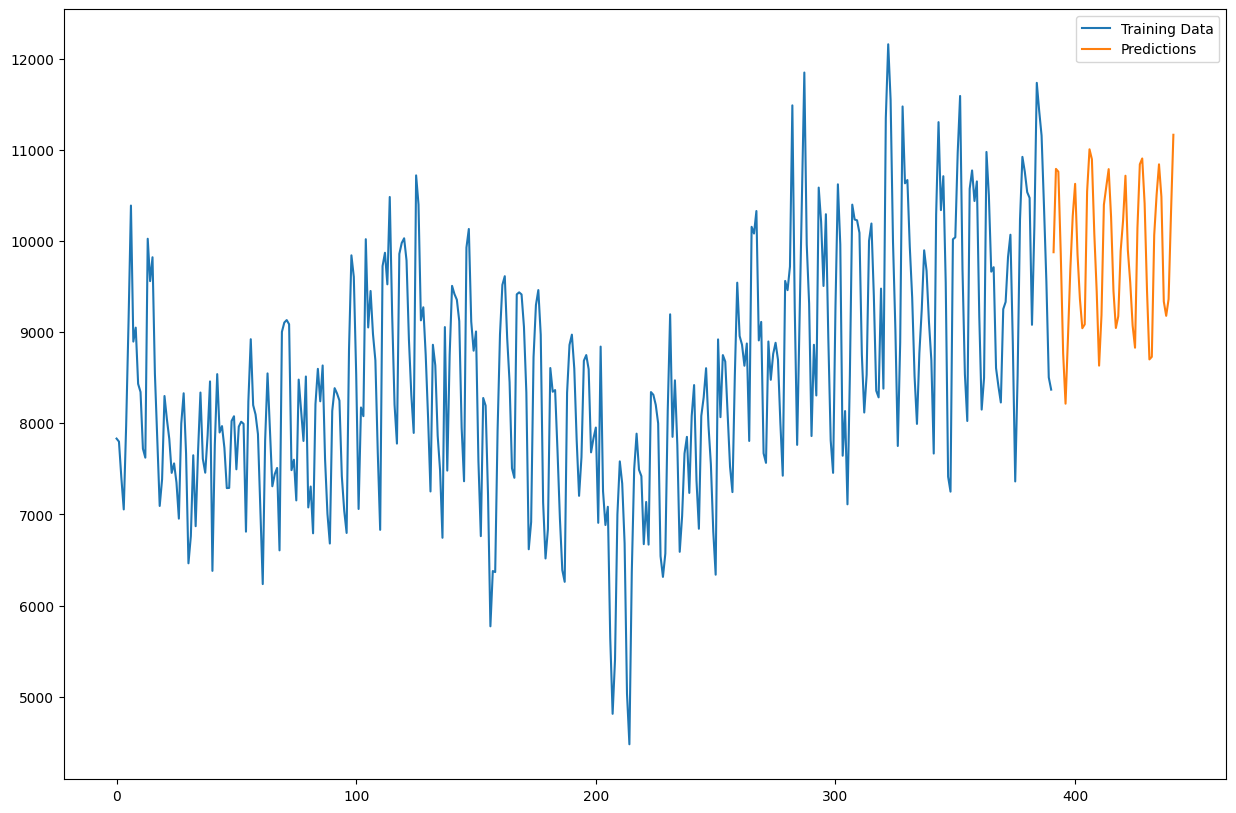

In [37]:
data['Views'].plot(legend=True, label='Training Data', 
                   figsize=(15, 10))
predictions.plot(legend=True, label='Predictions')